### Imports

In [1]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import (
    PortfolioOptimizationEnv,
)
from finrl.agents.portfolio_optimization.models import DRLAgent
from finrl.agents.portfolio_optimization.architectures import EI3, EIIE

### Fetch data

In [2]:
TOP_NASDAQ = [
    "AAPL", "MU", "CSCO", "MSFT",
    "META", "QQQ", "CMCSA", "INTC",
    "HBAN","NVDA"
]

In [3]:
df_train = YahooDownloader(start_date = '2013-01-02',
                          end_date = '2016-12-31',
                          ticker_list = TOP_NASDAQ).fetch_data()
df_train = df_train[["date", "tic", "close", "high", "low"]]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (10080, 8)


In [4]:
df_train

,date,tic,close,high,low
0,2013-01-02,AAPL,16.769091,19.821428,19.343929
1,2013-01-02,CMCSA,15.399468,19.285000,19.025000
2,2013-01-02,CSCO,14.441592,20.340000,20.010000
3,2013-01-02,HBAN,4.426588,6.600000,6.480000
4,2013-01-02,INTC,15.494061,21.379999,21.049999
...,...,...,...,...,...
10075,2016-12-30,META,115.050003,116.830002,114.769997
10076,2016-12-30,MSFT,56.736973,62.990002,62.029999
10077,2016-12-30,MU,21.549032,22.400000,21.750000
10078,2016-12-30,NVDA,26.301579,27.980000,26.575001


In [5]:
df_test = YahooDownloader(start_date = '2017-01-01',
                          end_date = '2017-12-08',
                          ticker_list = TOP_NASDAQ).fetch_data()
df_test = df_test[["date", "tic", "close", "high", "low"]]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (2360, 8)


In [6]:
df_test

,date,tic,close,high,low
0,2017-01-03,AAPL,27.023706,29.082500,28.690001
1,2017-01-03,CMCSA,29.556656,34.945000,34.115002
2,2017-01-03,CSCO,24.399660,30.559999,30.209999
3,2017-01-03,HBAN,9.867011,13.530000,13.220000
4,2017-01-03,INTC,30.279940,36.930000,36.270000
...,...,...,...,...,...
2355,2017-12-07,META,180.139999,180.389999,175.800003
2356,2017-12-07,MSFT,76.999313,82.800003,82.000000
2357,2017-12-07,MU,42.468891,43.230000,41.910000
2358,2017-12-07,NVDA,47.492165,48.400002,47.529999


### Instantiate environments

In [7]:
train_env = PortfolioOptimizationEnv(
        df_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50
)

Normalizing ['close', 'high', 'low'] by previous time...


In [8]:
test_env = PortfolioOptimizationEnv(
        df_test,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50
)

Normalizing ['close', 'high', 'low'] by previous time...


### Instantiate model

In [11]:
model_kwargs = {
    "lr": 0.01,
    "policy": EIIE,
}

policy_kwargs = {
    "k_size": 4
}

model = DRLAgent(train_env).get_model("pg", model_kwargs, policy_kwargs)

### Train model

In [12]:
DRLAgent.train_model(model, episodes=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 239419.078125
Final accumulative portfolio value: 2.39419078125
Maximum DrawDown: -0.17286674532678548
Sharpe ratio: 1.5495716137007212


 20%|██        | 1/5 [00:05<00:20,  5.09s/it]

Initial portfolio value:100000
Final portfolio value: 243522.203125
Final accumulative portfolio value: 2.43522203125
Maximum DrawDown: -0.17607936394171886
Sharpe ratio: 1.5502223182933907


 40%|████      | 2/5 [00:10<00:15,  5.05s/it]

Initial portfolio value:100000
Final portfolio value: 247721.984375
Final accumulative portfolio value: 2.47721984375
Maximum DrawDown: -0.17941853855540935
Sharpe ratio: 1.5502406077075601


 60%|██████    | 3/5 [00:15<00:10,  5.04s/it]

Initial portfolio value:100000
Final portfolio value: 251764.21875
Final accumulative portfolio value: 2.5176421875
Maximum DrawDown: -0.18244443291157308
Sharpe ratio: 1.550644055925178


 80%|████████  | 4/5 [00:20<00:05,  5.07s/it]

Initial portfolio value:100000
Final portfolio value: 255121.984375
Final accumulative portfolio value: 2.55121984375
Maximum DrawDown: -0.18480819294651674
Sharpe ratio: 1.5512908921226591


100%|██████████| 5/5 [00:25<00:00,  5.12s/it]


### Test model

In [42]:
DRLAgent.DRL_validation(model, test_env)

Initial portfolio value:100000
Final portfolio value: 136938.171875
Final accumulative portfolio value: 1.36938171875
Maximum DrawDown: -0.12800610194123907
Sharpe ratio: 1.7096462484413817


### Gráficos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


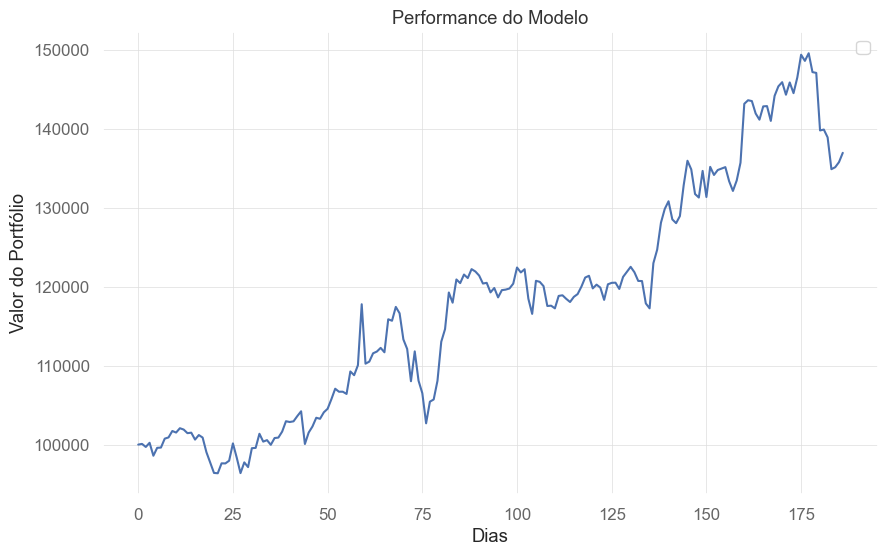

In [43]:
import matplotlib.pyplot as plt

plt.plot(test_env._asset_memory["final"])

plt.xlabel("Dias")
plt.ylabel("Valor do Portfólio")
plt.title("Performance do Modelo")
plt.legend()

plt.show()